In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Twitter Sentiment Analysis/Datas/'

os.listdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['twitter_training.csv', 'twitter_validation.csv']

In [4]:
training_data = pd.read_csv(path + 'twitter_training.csv')
validation_data = pd.read_csv(path +'twitter_validation.csv')

training_data.columns = ['id', 'entity', 'sentiment', 'context']
validation_data.columns = ['id', 'entity', 'sentiment', 'context']

data = pd.concat(
    [training_data, validation_data],
    ignore_index=True,
)

data = data.drop(['id', 'entity'], axis=1)

df = data.copy()

data.tail()

,sentiment,context
75675,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,Positive,Today sucked so it’s time to drink wine n play...
75678,Positive,Bought a fraction of Microsoft today. Small wins.
75679,Neutral,Johnson & Johnson to stop selling talc baby po...


In [5]:
data.isnull().any()

sentiment    False
context       True
dtype: bool

In [6]:
data.dropna(subset=['context'], inplace=True)

In [7]:
data.shape

(74994, 2)

In [8]:
data.sentiment.value_counts()

Negative      22624
Positive      20931
Neutral       18393
Irrelevant    13046
Name: sentiment, dtype: int64

In [9]:
data['sentiment'].value_counts().index

Index(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype='object')

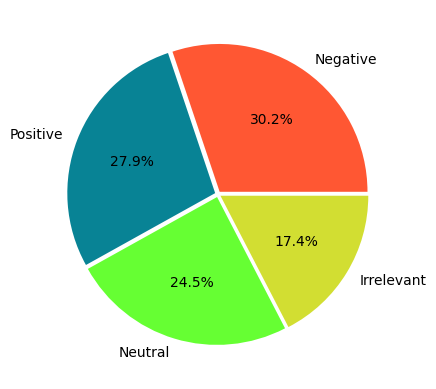

In [10]:
colors = [
    '#FF5733', '#088395', '#66FF33', '#D2DE32'
]

explodes = (0.02,0.02,0.02,0.02)

def plot_sentiment(data):

    value_counts = data['sentiment'].value_counts()
    labels = value_counts.index
    values = value_counts.values

    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explodes)
    plt.show()

plot_sentiment(data)

In [ ]:
sentiment_values = data['sentiment'].value_counts().index

def update_sentiment_values(sentiment):

    if sentiment == sentiment_values[0]:
        return 0
    elif sentiment == sentiment_values[1]:
        return 1
    elif sentiment == sentiment_values[2]:
        return 2
    elif sentiment == sentiment_values[3]:
        return 3
    else:
        return -1

data['sentiment'] = data['sentiment'].apply(update_sentiment_values)

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
eng_stopwords = stopwords.words('english')

sample_text = data['context'][75675]
sample_text = re.sub('[^a-zA-Z]', ' ', sample_text)
sample_text = [word.lower() for word in sample_text.split() if word.lower() not in eng_stopwords]

In [ ]:
# original text
data['context'][75675]

'⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you need to finally make a move! blog.remax.ca/toronto-housin… twitter.com/kevinyoufool/s…'

In [ ]:
# after preprocessing
' '.join(sample_text)

'toronto arts culture capital canada wonder want start planning sure check gta real estate market report fall info need finally make move blog remax ca toronto housin twitter com kevinyoufool'

In [ ]:
data.head()

,sentiment,context
0,1,I am coming to the borders and I will kill you...
1,1,im getting on borderlands and i will kill you ...
2,1,im coming on borderlands and i will murder you...
3,1,im getting on borderlands 2 and i will murder ...
4,1,im getting into borderlands and i can murder y...


In [ ]:
eng_stopwords = stopwords.words('english')

def preprocessing_context(context):
    context = re.sub('[^a-zA-Z]', ' ' ,context)
    context = [word.lower() for word in context.split() if word.lower() not in eng_stopwords]
    return ' '.join(context)

data['context'] = data['context'].apply(preprocessing_context)

data.head()

,sentiment,context
0,1,coming borders kill
1,1,im getting borderlands kill
2,1,im coming borderlands murder
3,1,im getting borderlands murder
4,1,im getting borderlands murder


In [ ]:
y = data['sentiment']
X = data['context']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
cv = CountVectorizer(max_features=29000)

X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)

In [ ]:
model_lr = LogisticRegression(
    solver='lbfgs'
)

model_lr.fit(X_train_vec, y_train)

y_pred = model_lr.predict(X_test_vec)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8326555103673579

In [ ]:
model_scv = SVC()

model_scv.fit(X_train_vec, y_train)

y_pred = model_scv.predict(X_test_vec)

accuracy_score(y_test, y_pred)

0.8673244882992199